# Fake news Detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


![I-Newspaper2.jpg](attachment:I-Newspaper2.jpg)

### Importing required library
Here I am going to importing some of the required library, if extra library is required to install It will be install later on.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
!pip install nltk
import nltk
from nltk import tokenize
import nltk
nltk.download('stopwords')

#Importing basic packages

#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


#from sklearn.neural_network import MLPClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.linear_model import SGDClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Inserting fake and real dataset

In [3]:
df_fake = pd.read_csv("/content/drive/MyDrive/Final project/Fake.csv")
df_true = pd.read_csv("/content/drive/MyDrive/Final project/True.csv")

In [4]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [6]:
df_fake["class"] = 0
df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [7]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [8]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [9]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

Merging the manual testing dataframe in single dataset and save it in a csv file

In [10]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

Merging the main fake and true dataframe

In [14]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)
df_marge.to_csv("total.csv")

In [15]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

subject
Government News     1570
Middle-east          768
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


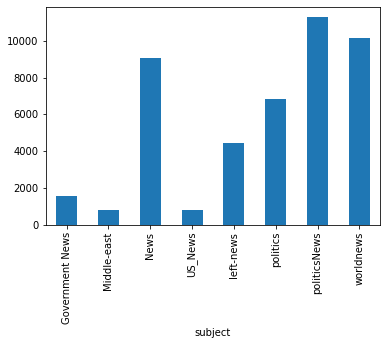

In [16]:
# How many articles per subject?
print(df_marge.groupby(['subject'])['text'].count())
df_marge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64


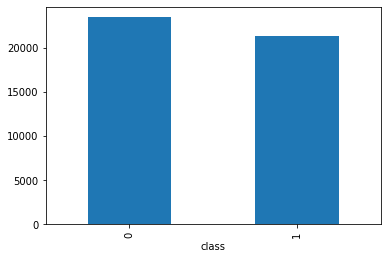

In [17]:
# How many fake and real articles?
print(df_marge.groupby(['class'])['text'].count())
df_marge.groupby(['class'])['text'].count().plot(kind="bar")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


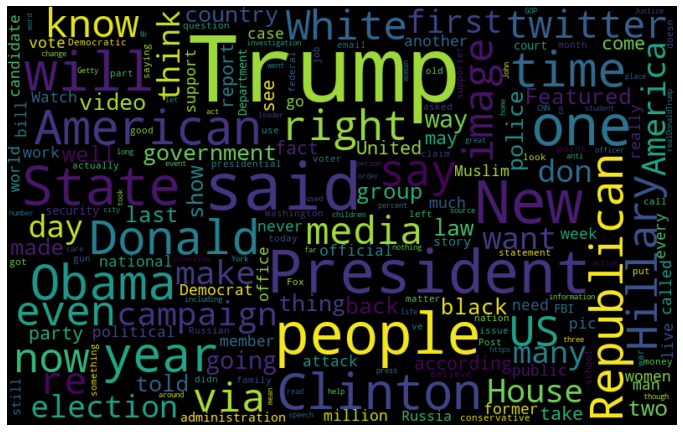

In [18]:
# Word cloud for fake news
!pip install wordcloud
from wordcloud import WordCloud

fake_data = df_marge[df_marge["class"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


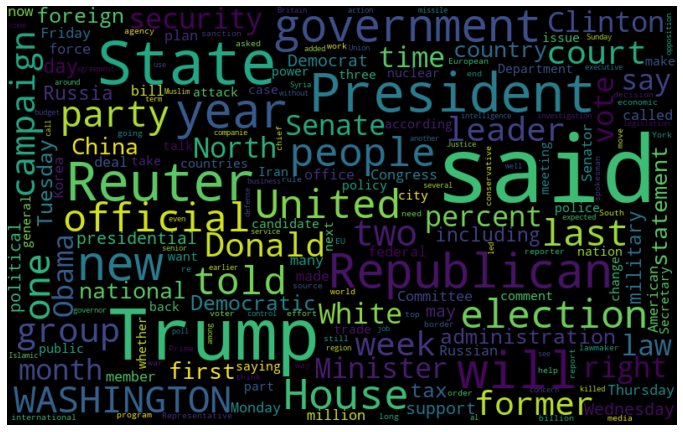

In [19]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = df_marge[df_marge["class"] == 1]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
# Most frequent words counter   
!pip install nltk
import nltk
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [21]:
df = df_marge.drop(["title", "subject","date"], axis = 1)

In [22]:
df.isnull().sum()

text     0
class    0
dtype: int64

#### Randomly shuffling the dataframe 

In [23]:
df = df.sample(frac = 1)

In [24]:
df.head()

,text,class
14555,SEOUL (Reuters) - Parasitic worms found in a N...,1
19236,NBC is canceling the third hour of Today to ...,0
6619,(Reuters) - The U.S. Congress should consider ...,1
3967,"As Election Day approaches, the threat of viol...",0
3916,WASHINGTON (Reuters) - The U.S. Senate on Thur...,1


In [25]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [26]:
df.columns

Index(['text', 'class'], dtype='object')

In [27]:
df.head()

,text,class
0,SEOUL (Reuters) - Parasitic worms found in a N...,1
1,NBC is canceling the third hour of Today to ...,0
2,(Reuters) - The U.S. Congress should consider ...,1
3,"As Election Day approaches, the threat of viol...",0
4,WASHINGTON (Reuters) - The U.S. Senate on Thur...,1


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., url and links.

In [28]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [29]:
df["text"] = df["text"].apply(wordopt)

In [30]:
df.head()

,text,class
0,seoul reuters parasitic worms found in a n...,1
1,nbc is canceling the third hour of today to ...,0
2,reuters the u s congress should consider ...,1
3,as election day approaches the threat of viol...,0
4,washington reuters the u s senate on thur...,1


In [31]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df.head(5)

,text,class
0,seoul reuters parasitic worms found north kore...,1
1,nbc canceling third hour today make way new st...,0
2,reuters u congress consider overhauling system...,1
3,election day approaches threat violence bloods...,0
4,washington reuters u senate thursday gave fina...,1


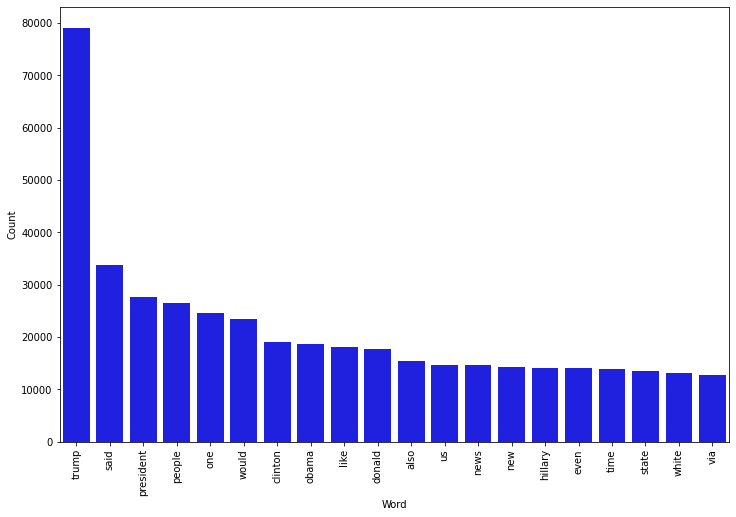

In [33]:
# Most frequent words in fake news
import seaborn as sns
counter(df[df["class"] == 0], "text", 20)

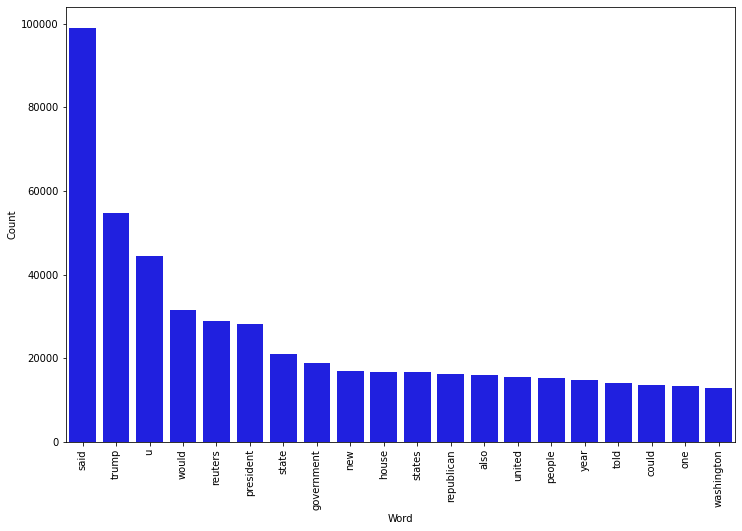

In [34]:
# Most frequent words in real news
counter(df[df["class"] == 1], "text", 20)

#### Defining dependent and independent variable as x and y

In [35]:
x = df["text"]
y = df["class"]

#### Splitting the dataset into training set and testing set. 

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [74]:
x_test.head()

33660    obama audacity tell crowd mourners wonders div...
42068    cleansing history continues heck wrong city me...
30897    tune alternate current radio network acr anoth...
33826    center immigration studies great resource fact...
28537    washington reuters senate intelligence committ...
Name: text, dtype: object

#### Convert text to vectors

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [39]:
# Function to plot the confusion matrix 
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 1. Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [42]:
pred_lr=LR.predict(xv_test)
print("Accuracy using Logistic Regression: {}%".format(round(accuracy_score(y_test,pred_lr)*100,2)))

Accuracy using Logistic Regression: 98.79%


Confusion matrix, without normalization


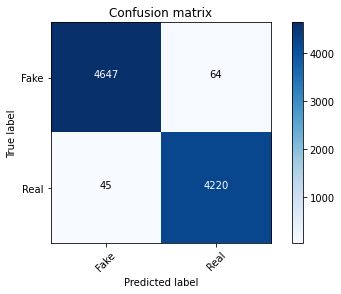

In [43]:
model1_cm=metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(model1_cm, classes=['Fake', 'Real'])

In [44]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4711
           1       0.99      0.99      0.99      4265

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



## 2.SVM CLASSIFIERS

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [46]:
# Classifier - Support Vector Machine
pipe2 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LinearSVC())])

model_svc = pipe2.fit(x_train, y_train)
svc_pred = model_svc.predict(x_test)
print("Accuracy of SVM Classifier: {}%".format(round(accuracy_score(y_test, svc_pred)*100,2)))

Accuracy of SVM Classifier: 99.53%


In [47]:
model_svc.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0])

Confusion matrix, without normalization


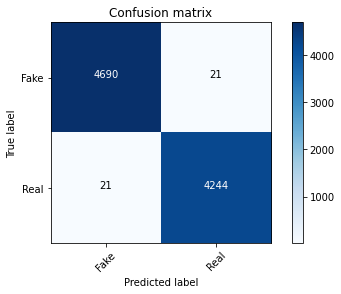

In [48]:
model1_cm=metrics.confusion_matrix(y_test, svc_pred)
plot_confusion_matrix(model1_cm, classes=['Fake', 'Real'])

In [49]:
print("\nConfusion Matrix of SVM Classifier:\n")
print(confusion_matrix(y_test, svc_pred))
print("\nClassification Report of SVM Classifier:\n")
print(classification_report(y_test, svc_pred))


Confusion Matrix of SVM Classifier:

[[4690   21]
 [  21 4244]]

Classification Report of SVM Classifier:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4711
           1       1.00      1.00      1.00      4265

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



### 3. Decision Tree Classification

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [52]:
pred_dt = DT.predict(xv_test)
print("Accuracy using Decision Tree : {}%".format(round(accuracy_score(y_test,pred_dt)*100,2)))

Accuracy using Decision Tree : 99.63%


In [53]:
DT.predict(xv_test)

array([0, 0, 0, ..., 1, 0, 0])

Confusion matrix, without normalization


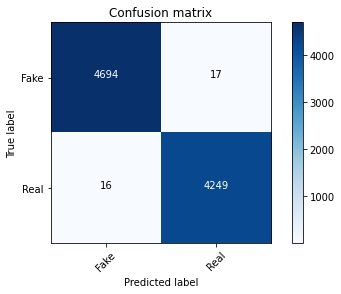

In [54]:
model1_cm=metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(model1_cm, classes=['Fake', 'Real'])

In [55]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4711
           1       1.00      1.00      1.00      4265

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



### 4. Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [58]:
pred_rfc = RFC.predict(xv_test)
print(accuracy_score(y_test,pred_rfc))
print("Accuracy using Random Forest: {}%".format(round(accuracy_score(y_test,pred_rfc)*100,2)))

0.9922014260249554
Accuracy using Random Forest: 99.22%


Confusion matrix, without normalization


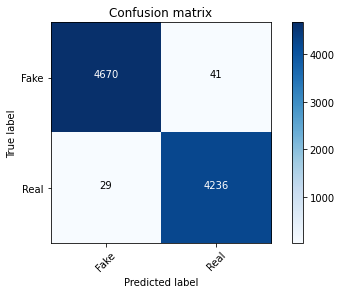

In [59]:
model2_cm = metrics.confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(model2_cm, classes=['Fake', 'Real'])

In [60]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4711
           1       0.99      0.99      0.99      4265

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



### 5. Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [63]:
pred_gbc = GBC.predict(xv_test)
print("Accuracy using Gradient Boosting : {}%".format(round(accuracy_score(y_test,pred_gbc)*100,2)))

Accuracy using Gradient Boosting : 99.49%


Confusion matrix, without normalization


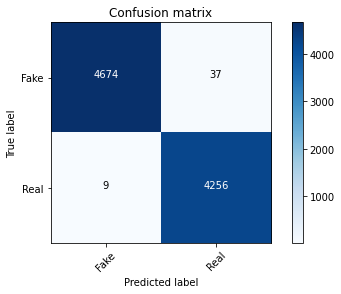

In [64]:
model1_cm=metrics.confusion_matrix(y_test, pred_gbc)
plot_confusion_matrix(model1_cm, classes=['Fake', 'Real'])

In [65]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4711
           1       0.99      1.00      0.99      4265

    accuracy                           0.99      8976
   macro avg       0.99      1.00      0.99      8976
weighted avg       0.99      0.99      0.99      8976



### COMPARING DIFFERENT ALGORITHMS

In [66]:
results = [0.9859,0.9953,0.9919,0.9930,0.9950]
names = ['LR','DTC','SVM','RF','GBC']
df = pd.DataFrame()
df['name'] = names
df['results']= results
df

,name,results
0,LR,0.9859
1,DTC,0.9953
2,SVM,0.9919
3,RF,0.9930
4,GBC,0.9950


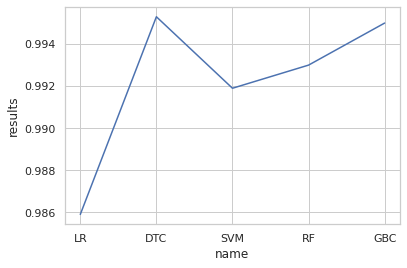

In [67]:
sns.set(style="whitegrid")
ax = sns.lineplot(y="results", x="name", data=df)

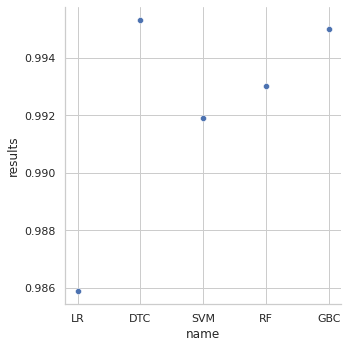

In [68]:
sns.set(style="whitegrid")
ax = sns.relplot(y="results", x="name", data=df)

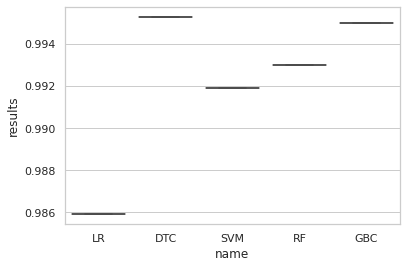

In [69]:
sns.set(style="whitegrid")
ax = sns.boxplot(y="results", x="name", data=df)

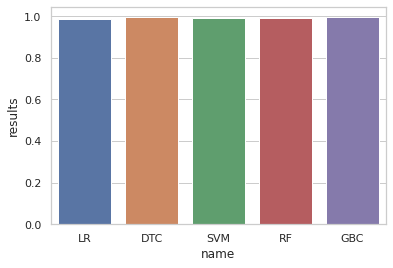

In [73]:
sns.set(style="whitegrid")
ax = sns.barplot(y="results", x="name", data=df)

# Model Testing With Manual Entry

### News

In [70]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_SVM = model_svc.predict(new_x_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nSVM Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0]),
                                                                                                              output_lable(pred_SVM[0])))

In [71]:
news = str(input())
manual_testing(news)

Donald


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News 
SVM Prediction: Fake News
